In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import PolynomialFeatures

<h4>Demo of scikit - Underfit,Normal,Overfit example</h4>
Purpose: Demonstrate how higher order polynomials can fit complex non-linear shape
This demo contains AWS ML equivalent example of underfitting vs overfitting example described here:<br>
http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [16]:
# Function to generate target value for a given x.
true_func = lambda X: np.cos(1.5 * np.pi * X)

In [17]:
np.random.seed(0)
# Training Set: No. of random samples used for training the model
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = true_func(x) + np.random.randn(n_samples) * 0.1

# Test Set: 100 samples for which we want the model to predict value
n_test = 100
x_test = np.linspace(0, 1, n_test)
y_test_actual = true_func(x_test) + np.random.randn(n_test) * 0.1

In [18]:
x[:5]

array([ 0.0202184 ,  0.07103606,  0.0871293 ,  0.11827443,  0.14335329])

In [19]:
x[:5],y[:5]

(array([ 0.0202184 ,  0.07103606,  0.0871293 ,  0.11827443,  0.14335329]),
 array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746]))

In [20]:
# Function to add more features from existing features
# in this case degree is the desired order of polynomials
# Example degree 3 with 1 feature x would output: x,x^2,x^3
# Similary, if there are multiple features x1,x2: x1,x2,x1*x2,x1^2,x1^2*x2,x1^3....and so forth
def generate_higher_order(degrees, x):
    # Generate higher order features from a given set of features.
    poly = PolynomialFeatures(degree=degrees, include_bias=False)
    x_new = poly.fit_transform(x)
    
    df = pd.DataFrame(x_new)
    df.columns = df.columns.map(lambda n: 'x' + str(n))
    return df

In [21]:
data_path = \
r'C:\AWSMLCourse\Data\RegressionExamples\under_over_fit_30samples'

In [22]:
# degrees for feature generation
degrees = [1, 4, 15]

In [23]:
# Generate training set for each of the degree
for d in degrees:
    df = generate_higher_order(d,x.reshape((n_samples,1)))
    df['y'] = y
    df.to_csv(os.path.join(data_path,'fit_degree_{0}_example_train{1}.csv'.format(d,n_samples)),
              index=True,index_label='Row')

In [24]:
# Generate Evaluation set.  Contains all the features and target.
# Generate Test set. Contains only the features.  AWSML would predict the target
for d in degrees:
    df = generate_higher_order(d, x_test.reshape((n_test,1)))
    
    df.to_csv(os.path.join(data_path,'fit_degree_{0}_example_test{1}.csv'.format(d,n_samples)),
              index=True,index_label='Row')
    
    df['y'] = y_test_actual
    
    df.to_csv(os.path.join(data_path,'fit_degree_{0}_example_eval{1}.csv'.format(d,n_samples)),
              index=True,index_label='Row')

In [25]:
# Pull Predictions
df_samples = pd.read_csv(os.path.join(data_path,'fit_degree_1_example_train30.csv'), index_col='Row')
df_actual = pd.read_csv(os.path.join(data_path,'fit_degree_1_example_eval30.csv'), index_col='Row')
df_d1_predicted = pd.read_csv(
    os.path.join(data_path,'output_deg_1',
    'bp-18eC2nNgezO-fit_degree_1_example_test30.csv.gz'))
df_d1_predicted.columns = ["Row","y_predicted"]

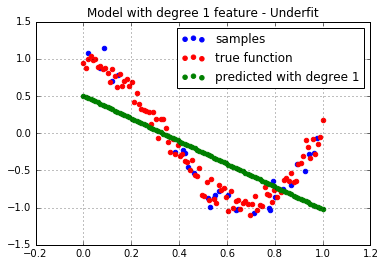

In [32]:
plt.scatter(x=df_samples['x0'],y=df_samples['y'],color='b',label='samples')
plt.scatter(x=df_actual['x0'],y=df_actual['y'],color='r',label='true function')
plt.scatter(x=df_actual['x0'],y=df_d1_predicted['y_predicted'],
            color='g',label='predicted with degree 1')
plt.title('Model with degree 1 feature - Underfit')
plt.grid(True)
plt.legend()

Polynomial with degree 1 is a straight line - Underfitting<br>
Training RMSE:0.5063, Evaluation RMSE:0.4308, Baseline RMSE:0.689

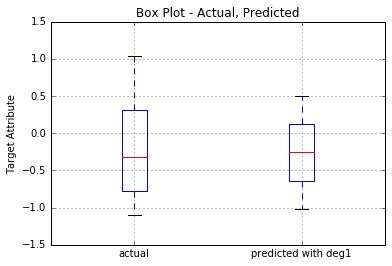

In [33]:
plt.boxplot([df_actual['y'],
             df_d1_predicted['y_predicted']], 
            labels=['actual','predicted with deg1'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target Attribute')
plt.grid(True)

<h4>Model with degree 4 features</h4>

In [34]:
df_d4_predicted = pd.read_csv(
    os.path.join(data_path,'output_deg_4',
    'bp-GDbDfIfQef8-fit_degree_4_example_test30.csv.gz'))
df_d4_predicted.columns = ["Row","y_predicted"]

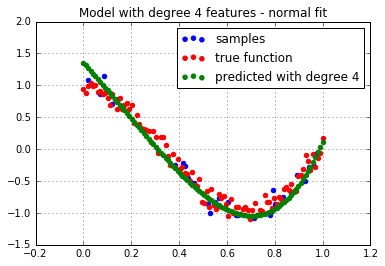

In [35]:
plt.scatter(x=df_samples['x0'],y=df_samples['y'],color='b',label='samples')
plt.scatter(x=df_actual['x0'],y=df_actual['y'],color='r',label='true function')
plt.scatter(x=df_actual['x0'],y=df_d4_predicted['y_predicted'],
            color='g',label='predicted with degree 4')
plt.title('Model with degree 4 features - normal fit')
plt.grid(True)
plt.legend()

Good Fit with degree 4 polynomial<br>
Training RMSE:0.2563, Evaluation RMSE:0.1493, Baseline RMSE:0.689

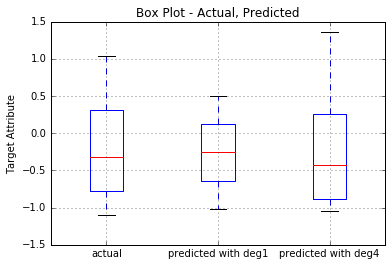

In [36]:
plt.boxplot([df_actual['y'],
             df_d1_predicted['y_predicted'],
             df_d4_predicted['y_predicted']], 
            labels=['actual','predicted with deg1','predicted with deg4'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target Attribute')
plt.grid(True)

<h4>Model with degree 15 features</h4>

In [37]:
df_d15_predicted = pd.read_csv(
    os.path.join(data_path,'output_deg_15',
    'bp-wr0EvVL9UA5-fit_degree_15_example_test30.csv.gz'))
df_d15_predicted.columns = ["Row","y_predicted"]

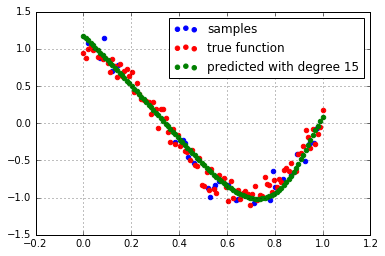

In [38]:
plt.scatter(x=df_samples['x0'],y=df_samples['y'],color='b',label='samples')
plt.scatter(x=df_actual['x0'],y=df_actual['y'],color='r',label='true function')
plt.scatter(x=df_actual['x0'],y=df_d15_predicted['y_predicted'],
            color='g',label='predicted with degree 15')
plt.grid(True)
plt.legend()

Not quite over fitting as shown in sci-kit example; fit is actually pretty good here.<br>
Training RMSE:0.2984, Evaluation RMSE:0.1222, Baseline RMSE:0.689

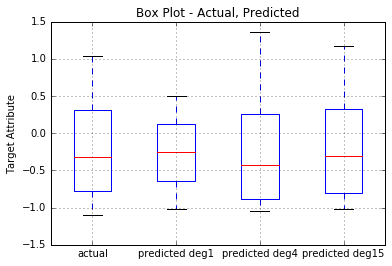

In [39]:
plt.boxplot([df_actual['y'],
             df_d1_predicted['y_predicted'],
             df_d4_predicted['y_predicted'],
             df_d15_predicted['y_predicted']], 
            labels=['actual','predicted deg1','predicted deg4','predicted deg15'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target Attribute')
plt.grid(True)

<h4>Summary</h4>
Adding polynomial features allows us fit more complex shapes.

To add polynomial features that combines all input features, use sci-kit module library.  Anaconda includes these modules by default.

We saw good performance with degree 4 and any additional feature may bring incremental improvement, but with added complexity of managing features.

1. Model Degree 1 
Training RMSE:0.5063, Evaluation RMSE:0.4308, Baseline RMSE:0.689
2. Model Degree 4 
Training RMSE:0.2563, Evaluation RMSE:0.1493, Baseline RMSE:0.689
3. Model Degree 15 
Training RMSE:0.2984, Evaluation RMSE:0.1222, Baseline RMSE:0.689